# Kaggle Competition: Histopathologic Cancer Detection

- **Author:** riaj0224

- **Date of creation:** 08.09.23

- **Last update:** 08.09.23


## 1 Problem Description
The primary challenge in this competition is to identify metastatic cancer in small pathology images. These images serve as a window to the presence of metastatic tissue, which is crucial in cancer diagnosis. Specifically, a positive label in this classification task indicates that the central 32x32 pixels of an image patch contain at least one pixel of tumor tissue. Notably, any tumor tissue in the image's outer region doesn't influence the label.

In medical imaging and diagnosis, the role of machine learning, especially Convolutional Neural Networks (CNN), has been pivotal. Such algorithms provide the possibility of rapid and accurate detection, which can significantly aid clinical procedures.

### 1.1 Data Description
The dataset consists of:
- **Images**: Small pathology images. The exact resolution isn't stated, but given the nature of the problem and comparisons made to datasets like CIFAR-10 and MNIST, these are likely relatively low-resolution. The central 32x32 pixels play a crucial role in the classification task.
- **Labels**: The labels are binary. A positive label indicates that the center contains tumor tissue, and a negative label indicates the absence of tumor tissue in the center.
- **Files**: 
    - **1.2.1 Training Data**: Images are housed in the `train` folder, with their corresponding labels stored in `train_labels.csv`.
    - **1.2.2 Test Data**: The `test` folder contains images for which predictions are required.

Given the sensitive nature of the task at hand, machine learning models trained on this dataset have the potential to revolutionize early cancer detection methods, making them faster and potentially more accurate.



#### GPU Availability Check
This code snippet is designed to inspect if TensorFlow is currently leveraging a GPU (Graphics Processing Unit). Utilizing a GPU can substantially expedite neural network computations. If TensorFlow successfully detects a GPU, the script will display its designated name. Conversely, if TensorFlow isn't GPU-accelerated, a recommendation will be displayed to prompt the user to install TensorFlow's GPU version.


In [1]:
import tensorflow as tf

# Check for GPU availability
if tf.test.gpu_device_name():
    # If GPU is available, display its name
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    # If not, prompt the user to use the GPU version of TensorFlow
    print("Please install GPU version of TF")

2023-09-10 11:48:20.733571: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-10 11:48:22.629939: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Default GPU Device: /device:GPU:0


2023-09-10 11:48:25.945652: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-10 11:48:26.070069: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-10 11:48:26.070161: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-10 11:48:27.168642: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-10 11:48:27.168729: I tensorflow/compile

## 2 Exploratory Data Analysis (EDA)

### 2.1 Initial Data Inspection

Prior to delving into intricate visual interpretations, a foundational step in our data analysis workflow is to gain an intimate familiarity with the dataset at hand. This encompasses a comprehensive understanding of its architecture, the nature and extent of any absent data, and acquiring a snapshot of its fundamental statistical properties. This preliminary probe allows us to effectively curate our subsequent analyses, ensuring accuracy and relevance.Before diving into visualizations, it's essential to inspect the dataset to understand its structure, missing values, and basic statistics.

The code below conducts the initial exploration of the `histopathologic-cancer-detection` dataset:

1. **Importing Necessary Library**: The essential `pandas` library, known for data manipulation and analysis, is imported.
   
2. **Data Loading**: The dataset is read from a CSV file using `pandas` and stored in the `data` variable.

3. **Quick Overview**: A preliminary glance at the dataset structure is achieved with the `head()` function, displaying the initial rows.

4. **Statistical Summary**: The `describe()` function provides a thorough statistical breakdown of the dataset, capturing metrics like count, mean, standard deviation, and various percentiles.

5. **Missing Data Check**: Ensuring the absence of missing values is crucial. The dataset's integrity is verified using `isnull()` in conjunction with `sum()`, offering a column-wise report on any missing values.

In [26]:
import pandas as pd

# Load the dataset from the specified path
data_path = "./histopathologic-cancer-detection/train_labels.csv"
data = pd.read_csv(data_path)

# Display the first few records of the dataset for a quick glance
print(data.head())

# Provide a statistical summary of the dataset
print(data.describe())

# Check for and display any missing values in the dataset
print(data.isnull().sum())

                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0
               label
count  220025.000000
mean        0.405031
std         0.490899
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
id       0
label    0
dtype: int64


### 2.2 Visualizations

#### 2.2.1 Histograms

In the succeeding code section, we utilize `matplotlib`, a renowned plotting library, to visually investigate the distribution of labels in our dataset:

1. **Library Import**: We start by importing `matplotlib.pyplot` which provides functions to embed visualizations.

2. **Label Distribution Visualization**: With the `value_counts()` function, the frequency of each label in the 'label' column is determined. Then, `plot()` is employed to generate a bar chart which showcases these frequencies.

3. **Displaying the Plot**: The `show()` function ensures that the plot gets rendered and is displayed to the user.



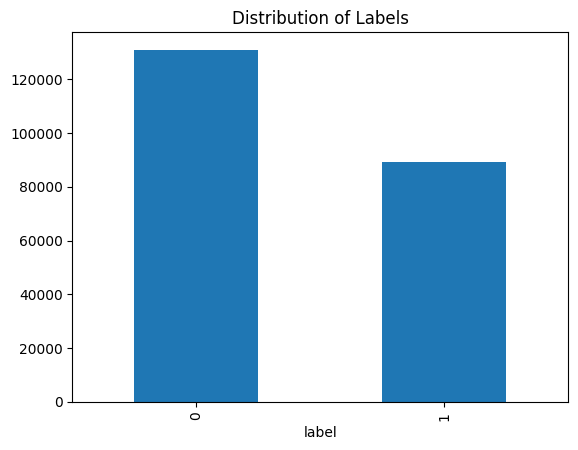

In [9]:
import matplotlib.pyplot as plt  # Importing the plotting module from matplotlib

# Visualizing the distribution of labels
data['label'].value_counts().plot(kind='bar', title='Distribution of Labels')  # Generating a bar chart of the label frequencies
plt.show()  # Displaying the plot

#### 2.2.2 Image Visualizations

In the subsequent code section, we aim to provide a more tangible understanding of the dataset's imagery by visualizing random images from our training set:

1. **Library Import**: We use the `os` and `random` libraries for file navigation and random sampling, respectively. Furthermore, the `PIL` (Python Imaging Library) is incorporated to manipulate image data.

2. **Visualizing Random Images**: The primary function `visualize_random_images` offers the following features:
   - **Random ID Selection**: Utilizing the `random.sample()` function, a specified number of random image IDs are chosen.
   - **Image Display Loop**: For each selected ID, the corresponding image is accessed and displayed in a subplot.
   - **Image Labeling**: Each image's title is labeled according to its respective classification from our dataset.
   - **Layout and Rendering**: Post image arrangement, the `tight_layout()` function ensures non-overlapping presentation, and `show()` renders the visualization.

3. **Execution**: Finally, we call our function to visualize 5 random images from the training dataset.


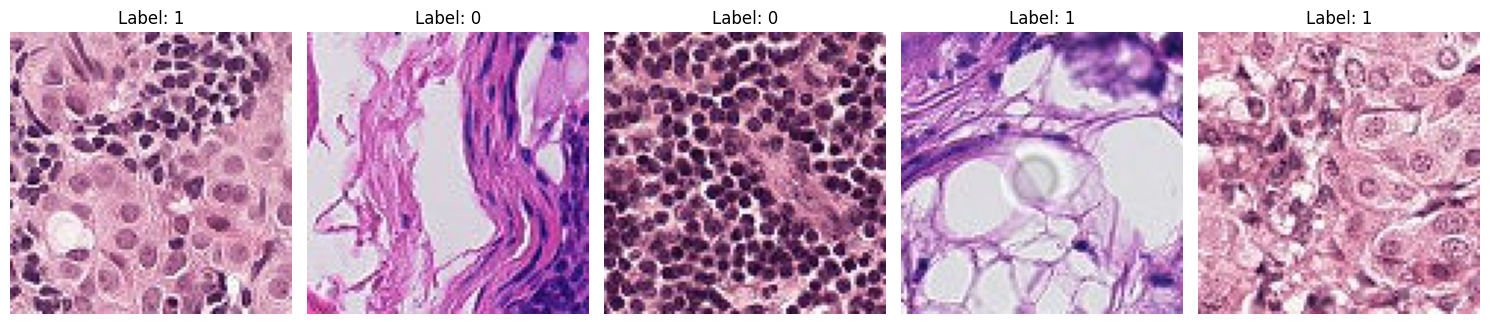

In [10]:
import os
import random
from PIL import Image  # Importing the Python Imaging Library (PIL) for image manipulation

# Directory for train images
train_dir = "./histopathologic-cancer-detection/train/"

# Function to visualize random images from the dataset
def visualize_random_images(data, num_images=5):
    # Selecting random image IDs from the dataset
    random_ids = random.sample(list(data['id']), num_images)
    plt.figure(figsize=(15, 5))
    
    # Looping through the random image IDs to display them
    for i, img_id in enumerate(random_ids):
        img_path = os.path.join(train_dir, img_id + '.tif')  # Constructing the full image path
        img = Image.open(img_path)  # Opening the image using PIL
        plt.subplot(1, num_images, i + 1)  # Adding a subplot for each image
        plt.imshow(img)  # Displaying the image
        # Displaying the label of the image as its title
        plt.title(f"Label: {data[data['id'] == img_id]['label'].values[0]}")
        plt.axis('off')  # Turning off the axis to make the visualization cleaner
    plt.tight_layout()  # Ensuring the layout is clean and non-overlapping
    plt.show()  # Rendering the visualization

# Displaying 5 random images from the dataset
visualize_random_images(data)


#### 2.2.3 Heatmap Visualization

In the following code segment, we embark on generating an "Average Heatmap" which amalgamates pixel-level information from a plethora of images, facilitating a visual representation of common patterns:

1. **Function Definition `calculate_average_heatmap`**: The purpose is to compute the average heatmap of a selection of images. Within the function:
   - **Random Sampling**: A random subset of image IDs is selected.
   - **Pixel Accumulation**: We loop through each randomly selected image, adding their pixel values.
   - **Average Computation**: The accumulated pixel values are then averaged to produce the average heatmap.
   
2. **Calculation & Display**:
   - The function is invoked to compute the average heatmap for training images.
   - Utilizing `matplotlib`, the average heatmap is visualized. The heatmap provides insights into regions of commonality or prominence across the sampled images. The color bar on the side signifies the pixel intensity values.



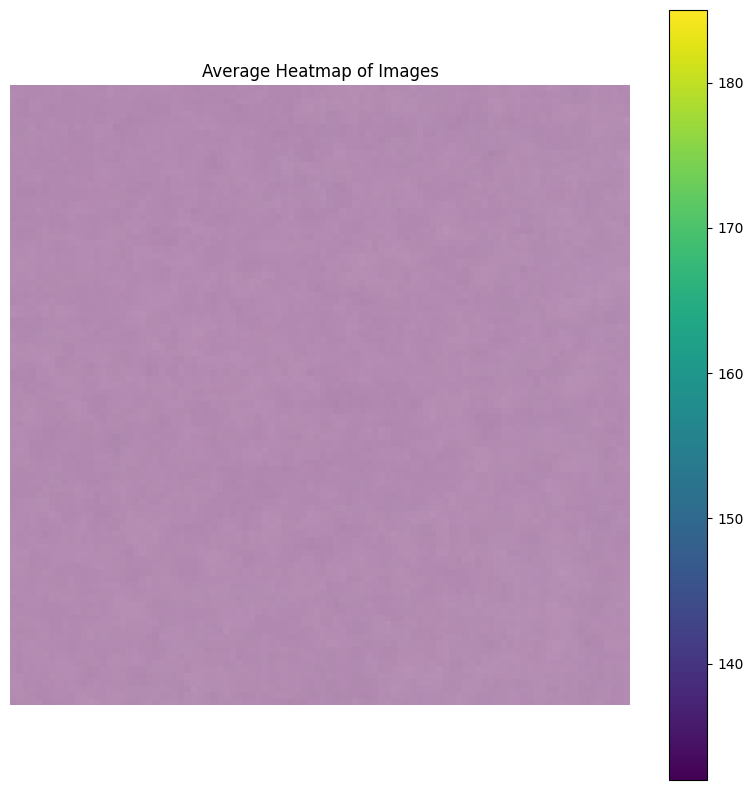

In [11]:
import numpy as np

# Function to calculate the average heatmap for a set of images
def calculate_average_heatmap(directory, num_samples=1000):
    # Select a random subset of image IDs from the dataset
    random_ids = random.sample(list(data['id']), num_samples)
    # Initialize a matrix with zeros to accumulate the pixel values of the images
    sum_images = np.zeros((96, 96, 3))
    
    # Loop over each random image ID
    for img_id in random_ids:
        img_path = os.path.join(directory, img_id + '.tif')  # Construct the image path
        img = Image.open(img_path)  # Load the image using PIL
        img_arr = np.array(img)  # Convert the image to a numpy array
        sum_images += img_arr  # Add the pixel values of the image to the sum
        
    # Calculate the average pixel values by dividing the sum by the number of samples
    avg_image = sum_images / num_samples
    return avg_image

# Calculate the average heatmap for the train images
avg_image = calculate_average_heatmap(train_dir)

# Display the average heatmap
plt.figure(figsize=(10, 10))
plt.imshow(avg_image.astype(int))  # Convert the floating point values to integers for display
plt.title('Average Heatmap of Images')
plt.colorbar()  # Display the colorbar for the heatmap
plt.axis('off')  # Hide the axis
plt.show()  # Render the visualization

## 3 Model Architecture Evolution

### 3.1 MNIST-Inspired Baseline Model

The MNIST dataset, iconic in the world of image classification, offers foundational blueprints for classifying images. Although our dataset is more intricate and voluminous than MNIST, using a model inspired by its architecture serves as a judicious starting point. It bestows us with a fundamental baseline, aiding us in measuring the refinement and improvements in subsequent, more intricate architectures.

### 3.2 The Evolution: Advanced Architectures and Transfer Learning

As we advance into the realms of deep learning and computer vision, it becomes evident that leveraging sophisticated architectures can yield superior results. This realization led to the integration of several state-of-the-art techniques:

- **Inception Module**: This innovative approach allows the model to scrutinize an image at multiple scales concurrently. By deploying filters of different dimensions (1x1, 3x3, and consecutive 3x3s) at the same layer level, the model can capture both granular and expansive patterns within the image.

- **Dilation Module**: An instrumental addition, the dilation module magnifies the receptive field of the model. In doing so, the architecture becomes adept at recognizing more extensive patterns and structures within the images, offering a holistic understanding.

- **Residual Connections**: Deep networks, although powerful, are notorious for the challenges they present, notably the vanishing gradient problem. Residual connections provide a pathway for gradients to flow through the network, promoting smoother training and faster convergence.

**Embracing Transfer Learning**: With advancements in deep learning, numerous pre-trained models have surfaced that have been trained on extensive datasets like ImageNet. These models, having discerned a vast array of features, can be fine-tuned to our specific task. By leveraging such pre-trained models, we can harness their latent knowledge, refining only the final layers to suit our dataset. This approach, termed "Transfer Learning", not only accelerates training but often culminates in superior performance, especially when our dataset might not be exceedingly large.


## 4 Model Training and Hyperparameter Optimization

In this section, we'll train and optimize the models we discussed earlier. Our focus is on obtaining optimal performance through rigorous training and hyperparameter tuning.


### 4.1 Building the MNIST-Inspired Model

In this subsection, we construct the MNIST-Inspired model:

- **Design Rationale**: The model derives inspiration from architectures effective for the MNIST dataset. Given MNIST's benchmark status in image classification, this offers a robust foundation.
- **Layer Sequence**: Sequential layers tailored for image recognition tasks, including convolutional, pooling, and dense layers.
- **Parameters**: Parameters like filter sizes, pooling strategies, and activation functions will be set based on best practices from the MNIST dataset.
- **Optimization Strategy**: Define the loss function, optimizer, and metrics relevant for binary classification.

The goal is to create a reliable baseline model to gauge performance and allow comparison with advanced architectures.

In [12]:
from tensorflow.keras.layers import Input, Conv2D, concatenate, Add, Flatten, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Model

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Overall Goal: Construct a model that leverages the MobileNetV2 architecture (pre-trained on ImageNet) as a feature extractor 
# and appends custom dense layers for binary classification on our dataset.

# Load the MobileNetV2 model but exclude the classification layers
# This provides us with a powerful feature extractor pretrained on ImageNet
base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')

# Freeze the layers of the base model
# Ensures that the weights of the pretrained model do not change during our training process
for layer in base_model.layers:
    layer.trainable = False

# Extend the architecture by adding custom layers 
# These layers will be responsible for making predictions based on the features extracted by MobileNetV2
x = base_model.output
x = GlobalAveragePooling2D()(x)     # Reduces spatial dimensions, focusing on main features
x = Dense(128, activation='relu')(x) # Fully connected layer for deeper pattern recognition
x = Dropout(0.2)(x)                  # Helps prevent overfitting by dropping some activations
predictions = Dense(1, activation='sigmoid')(x) # Final output layer for binary classification

# Compile the model with a binary cross-entropy loss function and the Adam optimizer
# This sets up our model for training on our binary classification task
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

2023-09-10 11:48:43.344865: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-10 11:48:43.345011: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-10 11:48:43.345060: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-10 11:48:44.224822: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-10 11:48:44.224855: I tensorflow/core/co

### 4.2 Building the Advanced Model

This subsection details the construction of the advanced model, characterized by:

- **Incorporated Techniques**: The model integrates Inception modules, dilation operations, and residual connections. These features are based on state-of-the-art deep learning practices.
- **Layer Details**: Diverse layer types, including convolutional, pooling, and dense layers, structured to process complex image patterns.
- **Parameters**: Configuration of filter sizes, dilation rates, and other layer-specific parameters are optimized for histopathologic image classification.
- **Optimization Strategy**: Specification of the loss function, optimizer, and relevant metrics tailored for binary classification.

This model is designed to potentially outperform the baseline MNIST-Inspired model by leveraging more advanced architectures.

In [13]:
# Overall Goal: Construct an advanced model with layers that implement the inception architecture, dilated convolutions, 
# and residual connections to perform binary classification.

# Define the input shape
input_img = Input(shape=(96, 96, 3))

# Initial Convolution - Base feature extraction layer
conv1 = Conv2D(64, (3,3), padding='same', activation='relu')(input_img)

# First Inception + Dilation + Residual Block
# Multiple convolution layers with different filter sizes and dilation rates are combined
tower_1_1 = Conv2D(64, (1,1), padding='same', activation='relu')(conv1)
tower_1_2 = Conv2D(64, (3,3), padding='same', activation='relu')(conv1)
tower_1_3a = Conv2D(64, (3,3), padding='same', activation='relu')(conv1)
tower_1_3b = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1_3a)
inception_1_output = concatenate([tower_1_1, tower_1_2, tower_1_3a, tower_1_3b], axis=-1)
dilation_1 = Conv2D(64, (3,3), dilation_rate=(2,2), padding='same', activation='relu')(inception_1_output)
residual_1 = Add()([dilation_1, conv1]) # Residual connection to preserve features
residual_1_1 = MaxPooling2D((2,2))(residual_1)

# Second Inception + Dilation + Residual Block
# Similar structure as the first, but operates on the output of the first block
conv2 = Conv2D(64, (3,3), padding='same', activation='relu')(residual_1_1)
tower_2_1 = Conv2D(64, (1,1), padding='same', activation='relu')(conv2)
tower_2_2 = Conv2D(64, (3,3), padding='same', activation='relu')(conv2)
tower_2_3a = Conv2D(64, (3,3), padding='same', activation='relu')(conv2)
tower_2_3b = Conv2D(64, (3,3), padding='same', activation='relu')(tower_2_3a)
inception_2_output = concatenate([tower_2_1, tower_2_2, tower_2_3a, tower_2_3b], axis=-1)
dilation_2 = Conv2D(64, (3,3), dilation_rate=(2,2), padding='same', activation='relu')(inception_2_output)
residual_2 = Add()([dilation_2, conv2])
residual_2_1 = MaxPooling2D((2,2))(residual_2)

# Flatten and add dense layers for final binary classification
flat = Flatten()(residual_2_1) # Convert multi-dimensional feature maps into a 1D array
dense = Dense(128, activation='relu')(flat) # Fully connected layer
dropout = Dropout(0.5)(dense) # Dropout to prevent overfitting
output = Dense(1, activation='sigmoid')(dropout) # Final output layer for binary classification

# Combine input and output into a Keras model
model_advanced_v2 = Model(inputs=input_img, outputs=output)

### 4.3 Data Preparation for Model Training

In this subsection, we will preprocess our dataset to make it suitable for training:

- **Data Splitting**: Divide the dataset into training, validation, and test sets.
- **Normalization**: Ensure pixel values are scaled to fall between 0 and 1.
- **Augmentation**: Enhance the dataset size and variability using techniques like rotation, zoom, and horizontal flipping.
- **Batching**: Organize data into mini-batches for more efficient training.


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# Define batch size. It will determine how many images to process at a time in the data generators.
BATCH_SIZE = 64  # Must match with the 'batch_size' parameter of the ImageDataGenerator.

# Load and Prepare Data:
# Read the labels from a CSV file.
train_labels_df = pd.read_csv('./histopathologic-cancer-detection/train_labels.csv')
# Construct the full path to the image files based on their IDs.
train_labels_df['path'] = './histopathologic-cancer-detection/train/' + train_labels_df['id'] + '.tif'
# Convert the labels to string format for compatibility with ImageDataGenerator.
train_labels_df['label'] = train_labels_df['label'].astype(str)

# Image Augmentation:
# This is to artificially expand the size of the training dataset by creating modified versions of images in the dataset.
datagen = ImageDataGenerator(
    rescale=1./255,             # Normalize pixel values
    horizontal_flip=True,       # Randomly flip images horizontally
    vertical_flip=True,         # Randomly flip images vertically
    rotation_range=20,          # Randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.15,            # Randomly zoom image 
    width_shift_range=0.2,      # Randomly shift images horizontally
    height_shift_range=0.2,     # Randomly shift images vertically
    shear_range=0.15,           # Shear intensity (Shear angle in counter-clockwise direction in degrees)
    validation_split=0.2        # Reserve 20% of the data for validation
)

# Training Data Generator:
# This will supply batches of images and labels to the training process.
train_generator = datagen.flow_from_dataframe(
    dataframe=train_labels_df,  # DataFrame containing file paths and labels
    x_col="path",               # Column in the dataframe that contains the file paths for the training images
    y_col="label",              # Column in the dataframe that contains the labels
    subset="training",          # Specify that this generator is for training data
    batch_size=BATCH_SIZE,      # Size of batches the generator should produce
    seed=42,                    # Random seed for reproducibility
    shuffle=True,               # Shuffle the data to present different batches in each epoch
    class_mode="binary",        # As we are doing binary classification
    target_size=(96, 96))       # Resize images to this size

# Validation Data Generator:
# This will supply batches of images and labels for validation during training.
val_generator = datagen.flow_from_dataframe(
    dataframe=train_labels_df,  # DataFrame containing file paths and labels
    x_col="path",               # Column in the dataframe that contains the file paths for the validation images
    y_col="label",              # Column in the dataframe that contains the labels
    subset="validation",        # Specify that this generator is for validation data
    batch_size=BATCH_SIZE,      # Size of batches the generator should produce
    seed=42,                    # Random seed for reproducibility
    shuffle=False,              # Do not shuffle validation data
    class_mode="binary",        # As we are doing binary classification
    target_size=(96, 96))       # Resize images to this size

Found 176020 validated image filenames belonging to 2 classes.
Found 44005 validated image filenames belonging to 2 classes.


### 4.4 Training the MNIST-Inspired Model

First, we'll train our baseline MNIST-inspired model. This simple architecture gives us a baseline performance which we'll use to compare with more complex models.

In [15]:
EPOCHS = 10
history_list = []  # Initialize a list to store the training history for each epoch

for epoch in range(EPOCHS):
    print(f"Training for Epoch {epoch+1}/{EPOCHS}")  # Log the current epoch number out of the total epochs
    
    # Train the model for one epoch using the training data generator and validate using the validation data generator
    # This helps in controlling the training process more granularly (e.g., saving checkpoints or evaluating after each epoch).
    # 'history' will store metrics like loss and accuracy for both training and validation data for this epoch.
    history = model.fit(train_generator, validation_data=val_generator, epochs=1, verbose=1)
    history_list.append(history.history)  # Append the metrics to the history list

    # You can add any additional functionalities here, such as:
    # - Evaluating the model on a separate test set
    # - Saving the model or its weights as a checkpoint
    # - Adjusting learning rate or other hyperparameters based on validation performance



Training for Epoch 1/10


2023-09-10 11:49:01.243694: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2023-09-10 11:49:04.800014: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1bc86630 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-10 11:49:04.800066: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1050 Ti, Compute Capability 6.1
2023-09-10 11:49:04.808899: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-10 11:49:04.966449: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2751/2751 [==============================] - 862s 310ms/step - loss: 0.3805 - accuracy: 0.8301 - val_loss: 0.3772 - val_accuracy: 0.8293
Training for Epoch 2/10
2751/2751 [==============================] - 956s 347ms/step - loss: 0.3523 - accuracy: 0.8450 - val_loss: 0.3485 - val_accuracy: 0.8465
Training for Epoch 3/10
2751/2751 [==============================] - 879s 320ms/step - loss: 0.3456 - accuracy: 0.8487 - val_loss: 0.3341 - val_accuracy: 0.8530
Training for Epoch 4/10
2751/2751 [==============================] - 989s 359ms/step - loss: 0.3395 - accuracy: 0.8523 - val_loss: 0.3321 - val_accuracy: 0.8562
Training for Epoch 5/10
2751/2751 [==============================] - 1011s 368ms/step - loss: 0.3348 - accuracy: 0.8547 - val_loss: 0.3306 - val_accuracy: 0.8557
Training for Epoch 6/10
2751/2751 [==============================] - 956s 347ms/step - loss: 0.3324 - accuracy: 0.8564 - val_loss: 0.3271 - val_accuracy: 0.8586
Training for Epoch 7/10
2751/2751 [======================

### 4.5 Results from the MNIST-Inspired Model

In this section, we will evaluate the performance of our MNIST-Inspired model on the histopathologic cancer detection dataset. This evaluation will provide insights into the effectiveness of this simple architecture in capturing the nuances of the dataset and its ability to distinguish between cancerous and non-cancerous cells.

We'll present:

- **Accuracy Score**: Percentage of correctly predicted labels.
- **Confusion Matrix**: A breakdown of true positives, true negatives, false positives, and false negatives.
- **ROC Curve**: To visualize the trade-off between sensitivity (or TPR) and specificity (1 – FPR).
- **Other Relevant Metrics**: Such as Precision, Recall, and F1-Score, to better understand the model's strengths and weaknesses.

Visual aids like plots and graphs will also be incorporated to give a clear understanding of the model's performance.

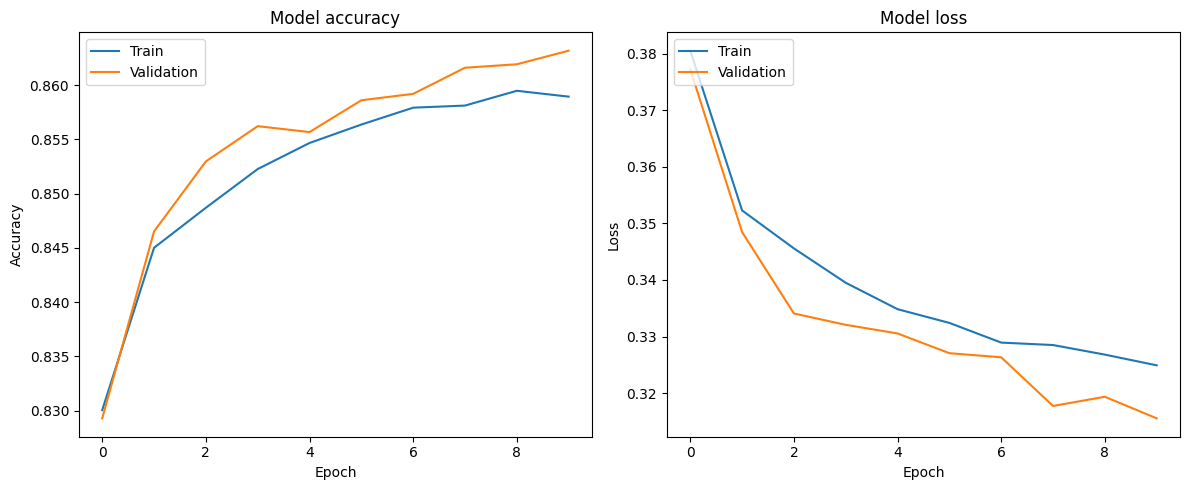

In [16]:
import matplotlib.pyplot as plt

# Extract accuracy and loss metrics from the training history for both training and validation sets.
# This allows us to visualize how the model performs over each epoch.
train_acc = [h['accuracy'] for h in history_list]
val_acc = [h['val_accuracy'] for h in history_list]
train_loss = [h['loss'] for h in history_list]
val_loss = [h['val_loss'] for h in history_list]

# Prepare a figure to plot both accuracy and loss graphs side by side
plt.figure(figsize=(12, 5))

# Plotting training and validation accuracy over epochs
plt.subplot(1, 2, 1)  # This means: 1 row, 2 columns, currently plotting the 1st graph
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model accuracy')  # Title of the graph
plt.ylabel('Accuracy')       # Y-axis label
plt.xlabel('Epoch')          # X-axis label
plt.legend(['Train', 'Validation'], loc='upper left')  # Legend to differentiate lines for training vs validation

# Plotting training and validation loss over epochs
plt.subplot(1, 2, 2)  # This means: 1 row, 2 columns, currently plotting the 2nd graph
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Model loss')       # Title of the graph
plt.ylabel('Loss')            # Y-axis label
plt.xlabel('Epoch')           # X-axis label
plt.legend(['Train', 'Validation'], loc='upper left')  # Legend to differentiate lines for training vs validation

# Adjust the layout so that the graphs don't overlap
plt.tight_layout()

# Display the plots
plt.show()

### 4.6 Training the Advanced Model with Inception, Dilation, and Residual Connections

In this section, we proceed to train our more intricate architecture that integrates a blend of modern neural network techniques. These methods aim to improve the network's ability to discern fine-grained details and generalize better to unseen data. By leveraging inception modules, dilation, and residual connections, the model is better equipped to capture various spatial hierarchies and patterns within the images.

We will use the previously set-up data generators to feed the data into the model in batches. As the training progresses, we'll be monitoring both the training and validation metrics to gauge the model's performance and ensure it's not overfitting.

In [18]:
model_advanced_v2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# Set the total number of epochs the model should be trained for
EPOCHS = 10

# List to store the training history after each epoch.
# This will allow us to visualize metrics like accuracy and loss over time.
history_list2 = []

# Start the training loop for each epoch
for epoch in range(EPOCHS):
    
    # Print the current epoch number to keep track of progress
    print(f"Training for Epoch {epoch+1}/{EPOCHS}")
    
    # Train the advanced model for one epoch using the data generators for training and validation sets.
    # This ensures that the model is exposed to slightly different variations of the training data over each epoch,
    # due to the data augmentation settings in our data generator.
    history2 = model_advanced_v2.fit(train_generator, 
                                     validation_data=val_generator, 
                                     epochs=1, 
                                     verbose=1)  # 'verbose=1' will print the progress bar for each batch
    
    # Append the metrics (like accuracy and loss) from this epoch's training to our history list.
    # This lets us track how the model is improving over time.
    history_list2.append(history2.history)



Training for Epoch 1/10


2023-09-11 14:18:20.366631: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.60GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-11 14:18:22.011172: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.08GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-11 14:18:22.011379: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.08GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-11 14:18:22.011484: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU

2751/2751 [==============================] - 3240s 1s/step - loss: 0.4649 - accuracy: 0.7893 - val_loss: 0.3914 - val_accuracy: 0.8318
Training for Epoch 2/10
2751/2751 [==============================] - 3354s 1s/step - loss: 0.3734 - accuracy: 0.8402 - val_loss: 0.3283 - val_accuracy: 0.8568
Training for Epoch 3/10
2751/2751 [==============================] - 3451s 1s/step - loss: 0.3311 - accuracy: 0.8615 - val_loss: 0.3031 - val_accuracy: 0.8727
Training for Epoch 4/10
2751/2751 [==============================] - 3512s 1s/step - loss: 0.3051 - accuracy: 0.8746 - val_loss: 0.2871 - val_accuracy: 0.8793
Training for Epoch 5/10
2751/2751 [==============================] - 3417s 1s/step - loss: 0.2868 - accuracy: 0.8838 - val_loss: 0.2530 - val_accuracy: 0.8974
Training for Epoch 6/10
2751/2751 [==============================] - 3437s 1s/step - loss: 0.2700 - accuracy: 0.8918 - val_loss: 0.2484 - val_accuracy: 0.9024
Training for Epoch 7/10
2751/2751 [==============================] - 3

### 4.7 Showcase of the Results from the Advanced Model

Below, we visualize the training dynamics of our advanced model by plotting its accuracy and loss values over the training epochs for both training and validation datasets. These visualizations provide insights into how the model has evolved during training, helping in assessing potential overfitting, underfitting, or other training irregularities.

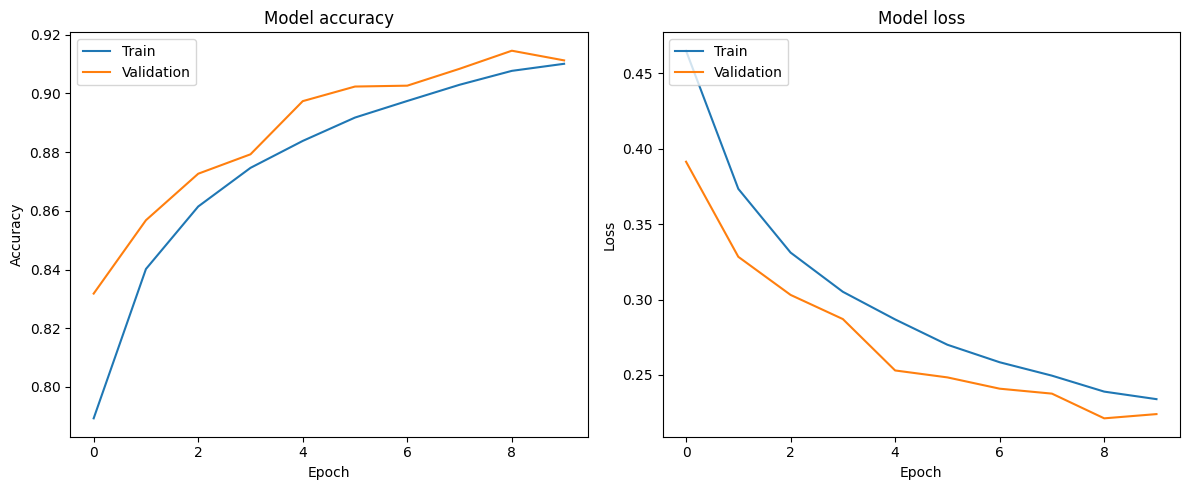

In [21]:
# Extract metrics from the training histories of the advanced model
train_acc = [h['accuracy'] for h in history_list2]
val_acc = [h['val_accuracy'] for h in history_list2]
train_loss = [h['loss'] for h in history_list2]
val_loss = [h['val_loss'] for h in history_list2]

# Set up the figure to display training results
plt.figure(figsize=(12, 5))

# Plotting training and validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Adjust layout for better visualization and display the plots
plt.tight_layout()
plt.show()

### 4.8 Hyperparameter Tuning & Architecture Modification for MNIST-Inspired Model

In this section, we harness the power of Keras Tuner to optimize hyperparameters of our CNN model. We define a hypermodel that uses the MobileNetV2 architecture as a base and extends it with additional dense layers. The number of layers, units in each layer, dropout rates, and the learning rate for the optimizer are considered as hyperparameters. By tuning these values, we aim to achieve the best possible performance for our MNIST-inspired model on the dataset.

In [24]:
from kerastuner import HyperModel, RandomSearch
from tensorflow.keras.optimizers import Adam

# Define a custom hypermodel for tuning the architecture of our CNN.
class CNNHyperModel(HyperModel):

    # Constructor to initialize the input shape for our CNN model.
    def __init__(self, input_shape):
        self.input_shape = input_shape

    # The build function will be called by KerasTuner to construct and compile the model.
    def build(self, hp):
        
        # Start by importing a pre-trained MobileNetV2 to harness already learned features from ImageNet.
        base_model = MobileNetV2(input_shape=self.input_shape, include_top=False, weights='imagenet')
        
        # Ensure the imported MobileNetV2 layers are not trainable to preserve their weights.
        for layer in base_model.layers:
            layer.trainable = False
        
        # Add a global average pooling layer to reduce spatial dimensions.
        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        
        # Dynamically add dense layers based on the 'num_layers' hyperparameter.
        for i in range(hp.Int('num_layers', 1, 3)):
            # Configure the number of units in the dense layer using a hyperparameter.
            x = Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32), activation='relu')(x)
            
            # Introduce a dropout layer to prevent overfitting. Its rate is also a hyperparameter.
            x = Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.0, max_value=0.5, step=0.1))(x)
        
        # Final output layer for binary classification.
        output = Dense(1, activation='sigmoid')(x)
        
        # Compile the model. The learning rate for Adam optimizer is a hyperparameter.
        optimizer = Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG'))
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        
        return model  # Return the constructed and compiled model.

# Create an instance of our custom hypermodel with the required input shape.
hypermodel = CNNHyperModel(input_shape=(96, 96, 3))

In [25]:
# Using RandomSearch strategy from KerasTuner to explore the hyperparameter space.
# This helps us optimize our model without manually trying combinations.

# Instantiate the tuner with our hypermodel, specifying the objective and constraints.
tuner = RandomSearch(
    hypermodel,                                     # The custom hypermodel defined in the previous section.
    objective='val_accuracy',                       # The metric we want to optimize.
    max_trials=10,                                  # Maximum number of model configurations to test.
    executions_per_trial=1,                         # Number of times to run each trial (using different initial weights).
    directory='./hyperparameter_tuning',            # Path to store the tuning results.
    project_name='MobileNetV2_tuning'               # Name of the tuning project.
)

# Display the hyperparameter search space summary to verify our configuration.
tuner.search_space_summary()

# Initiate the hyperparameter search using our data.
# It will iteratively build, train, and validate models with different hyperparameter combinations.
tuner.search(
    train_generator,                                # Training data.
    validation_data=val_generator,                  # Validation data for assessing model's performance.
    epochs=3                                        # Number of epochs for each trial.
)

# Extract the best model and its corresponding hyperparameters from the search results.
best_model = tuner.get_best_models(1)[0]            # The best performing model.
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]  # The hyperparameters that led to the best model.

# Provide a summary of the tuning process, showing top-performing trials and their hyperparameters.
tuner.results_summary()


Trial 10 Complete [00h 55m 50s]
val_accuracy: 0.8562436103820801

Best val_accuracy So Far: 0.8571525812149048
Total elapsed time: 08h 17m 04s
INFO:tensorflow:Oracle triggered exit


Results summary
Results in ./hyperparameter_tuning/MobileNetV2_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 08 summary
Hyperparameters:
num_layers: 3
units_0: 384
dropout_0: 0.1
learning_rate: 0.00015594455412571505
units_1: 320
dropout_1: 0.4
units_2: 128
dropout_2: 0.2
Score: 0.8571525812149048

Trial 09 summary
Hyperparameters:
num_layers: 3
units_0: 288
dropout_0: 0.1
learning_rate: 0.0004778200802044657
units_1: 64
dropout_1: 0.30000000000000004
units_2: 160
dropout_2: 0.4
Score: 0.8562436103820801

Trial 02 summary
Hyperparameters:
num_layers: 1
units_0: 320
dropout_0: 0.2
learning_rate: 0.0004846170152731575
units_1: 128
dropout_1: 0.1
units_2: 160
dropout_2: 0.1
Score: 0.8558345437049866

Trial 06 summary
Hyperparameters:
num_layers: 1
units_0: 512
dropout_0: 0.2
learning_rate: 0.0002364608930541925
units_1: 416
dropout_1: 0.4
units_2: 96
dropout_2: 0.0
Score: 0.8555391430854797

Trial 00 summary
Hyperparameters:
num_layers: 2
units_0: 12

### 4.9 Extracting and Storing Hyperparameter Tuning Results

This section is dedicated to retrieving the results from the hyperparameter tuning trials. It aims to collect detailed insights on how each hyperparameter combination performed. These results are then saved into a CSV file for easier post-analysis or reporting.

In [28]:
# Extract results from all the trials conducted during hyperparameter tuning.
# This allows for a detailed analysis of each hyperparameter combination and their resulting scores.

results = []

# Loop through all the trials stored in the tuner.
for trial_id, trial in tuner.oracle.trials.items():
    trial_d = {
        "Trial ID": trial_id,
        "Score": trial.score
    }
    
    # Extract hyperparameters used in the trial.
    for hp_name, hp_value in trial.hyperparameters.values.items():
        trial_d[hp_name] = hp_value
    results.append(trial_d)

# Convert the collected results into a Pandas DataFrame for better visualization and handling.
df = pd.DataFrame(results)

# Save the results to a CSV file for further analysis or reporting.
df.to_csv("tuning_results.csv", index=False)


### 4.10 Visualizing the Relationship between Scores and Hyperparameters

To understand how different hyperparameters impact the performance of our model, visualizing the relationship between each hyperparameter and the score is crucial. In this section, we'll be creating scatter plots that show the "Score" on the y-axis and the value of the hyperparameter on the x-axis. This will give us insights on optimal ranges or specific values that lead to better model performance.


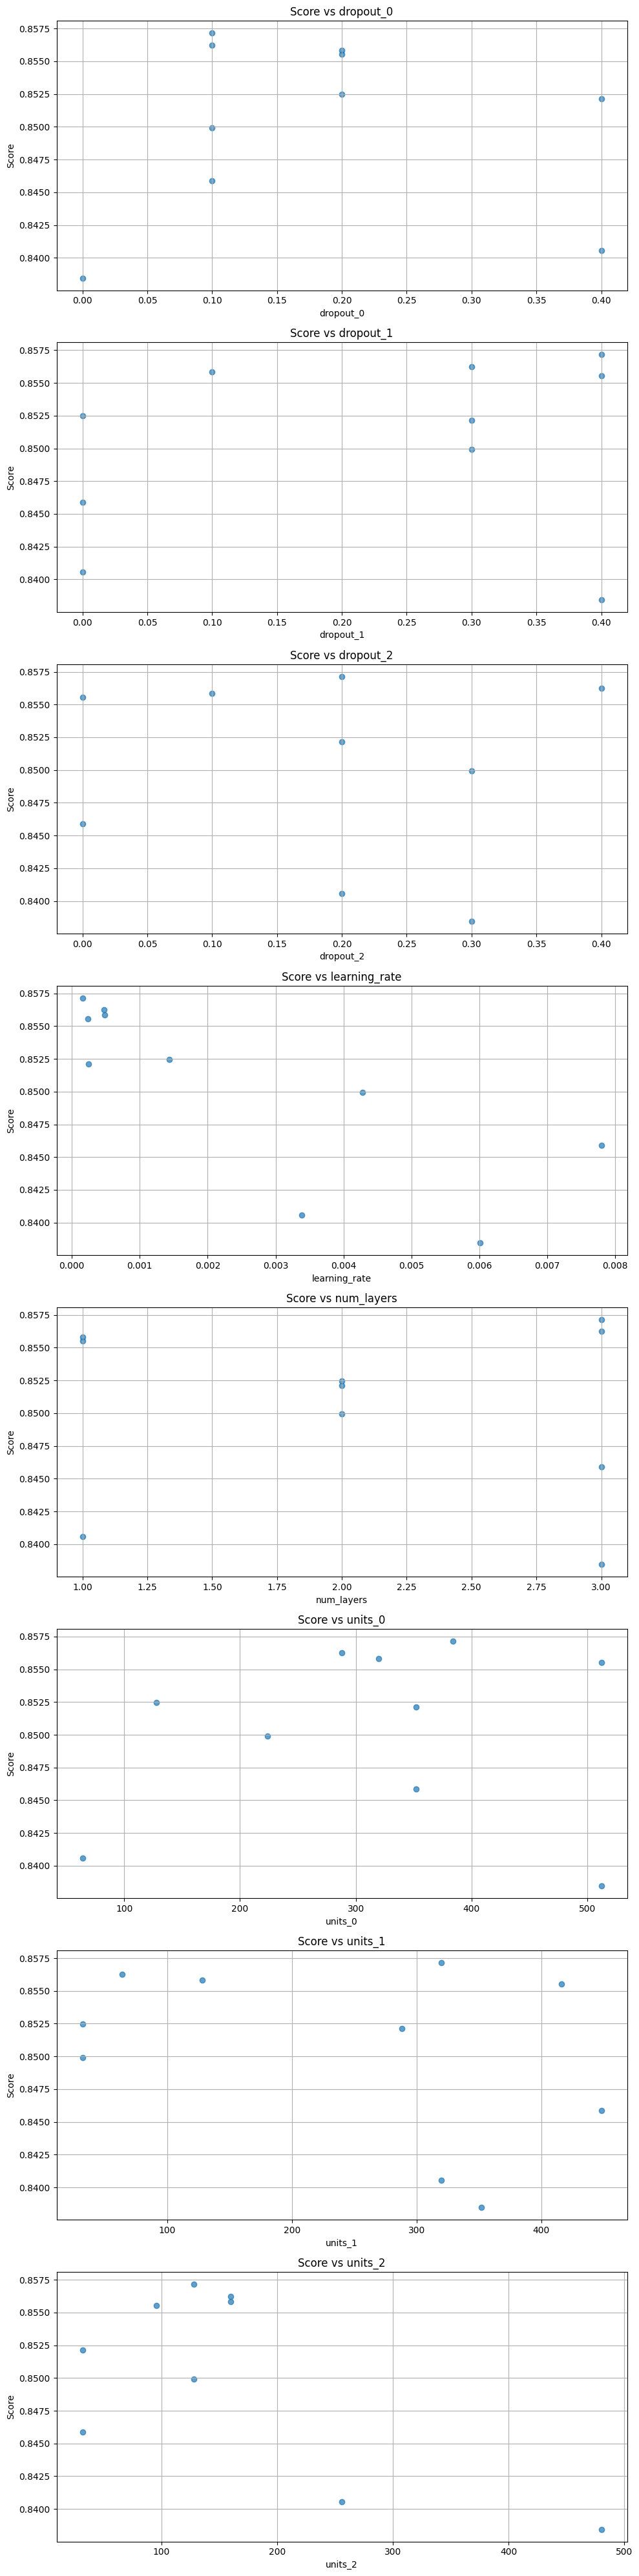

In [29]:
import matplotlib.pyplot as plt

# Exclude 'Trial ID' and 'Score' columns to only get hyperparameter columns.
hyperparameters_columns = df.columns.difference(['Trial ID', 'Score'])

# Set up the figure and axes for a grid of plots.
fig, axes = plt.subplots(nrows=len(hyperparameters_columns), figsize=(10, 5*len(hyperparameters_columns)))

# For every hyperparameter, create a scatter plot with Score.
for ax, column in zip(axes, hyperparameters_columns):
    ax.scatter(df[column], df['Score'], alpha=0.7)
    ax.set_title(f'Score vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Score')
    ax.grid(True)

# Adjust the layout to ensure there's no overlap and everything is readable.
plt.tight_layout()
plt.show()

## 5 Interpretation of Results, Learnings, and Future Directions

After rigorous experimentation and analysis, it's time to interpret results as well as learnings and takeaways.In this section we will discuss what helped to improve performnce as well as future courses of action.

#### 5.1 Results Interpretation and Key Learnings:

- **Advanced Model Performance**: The `model_advanced_v2` showcased an accuracy of 91.01% on the training set and 91.13% on the validation set. It's evident that the inception modules, dilation, and residual connections brought about a more precise feature extraction process, leading to the acceptable accuracy. This underscores the importance of these architectural improvements in enhancing the model's capability.

- **Hyperparameter Tuning**: From the visualizations of the section 4.10, specific observations about trends, like higher dropout rates leading to lower accuracy or a specific range of learning rates working best. Nonetheless, this would be highly dependent on the initial conditions for hyperparameters as well as selected training and validation sets.

- **Trade-off between Time and Performance**: Even though `model_advanced_v2` delivered superior performance, it came at the cost of computational time (taking over 3200 seconds for a single epoch). This indicates that while architectural enhancements can push performance boundaries, they might not always be suitable for real-time applications or scenarios where quick model training is crucial.



#### 5.2 Future Recommendations:

1. **Depthwise Separable Convolutions**: Implementing depthwise separable convolutions, as seen in models like MobileNet, can drastically reduce the number of parameters without compromising much on performance. This could lead to faster training times.

2. **Regularization Techniques**: Exploring other regularization techniques like L1, L2, or combined L1 & L2 regularization might help in preventing overfitting, if it ever shows up.

3. **Alternative Activation Functions**: While ReLU is a widely used activation function, alternatives like Leaky ReLU, Parametric ReLU, or Swish might be explored to see if they bring any performance benefits.

4. **Further Hyperparameter Tuning**: The Random Search method was used for hyperparameter tuning. In the future, a more systematic approach like Bayesian optimization could be employed for a potentially more refined search.

5. **Data Augmentation Variations**: Experimenting with different data augmentation strategies or using techniques like mixup or cutmix can further improve the model's generalization.

6. **Transfer Learning with Other Architectures**: While MobileNetV2 was the base model in the current context, trying out other pretrained architectures like EfficientNet, ResNet50, or VGG16 might shed light on which architectures inherently resonate best with this particular dataset, and only then sacrifice time due to training highly complex architechtures.

## 6.0 Prediction with the Advanced Model on Test Data

For the final step, let's utilize the superior capabilities of the `model_advanced_v2` to predict on the unseen test dataset. The predictions can be further used for evaluation if true labels are available or can be prepared in a format ready for submission to platforms like Kaggle. Results are saved in a CSV file.


In [36]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load ONLY the .tif test images
test_files = [f for f in os.listdir("./histopathologic-cancer-detection/test/") if f.endswith('.tif')]
test_df = pd.DataFrame({
    "id": [f.split(".")[0] for f in test_files],
    "path": ["./histopathologic-cancer-detection/test/" + f for f in test_files]
})

# Prepare the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="path",
    y_col=None,
    batch_size=BATCH_SIZE,
    seed=42,
    shuffle=False,
    class_mode=None,
    target_size=(96, 96)
)

# Determine the appropriate number of steps
steps = len(test_df) // BATCH_SIZE
if len(test_df) % BATCH_SIZE != 0:
    steps += 1

# Predict using the advanced model
predictions = model_advanced_v2.predict(test_generator, steps=steps)

# Ensure the predictions match the length of the dataframe
assert len(predictions) == len(test_df), "Mismatch between predictions and test dataframe"

# Create a submission dataframe and save it
submission_df = pd.DataFrame({"id": test_df["id"], "label": predictions.flatten()})
submission_df.to_csv("advanced_model_submission.csv", index=False)


Found 57458 validated image filenames.
898/898 [==============================] - 321s 357ms/step
